In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
test_image = cv2.imread('/home/nishant/Wipro/work/Dataset/SKU_Identification/Testimage/enchanteur_perfumedtalcum/BoxImage_0335.jpg') 

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

def gradients(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

In [4]:
def display_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

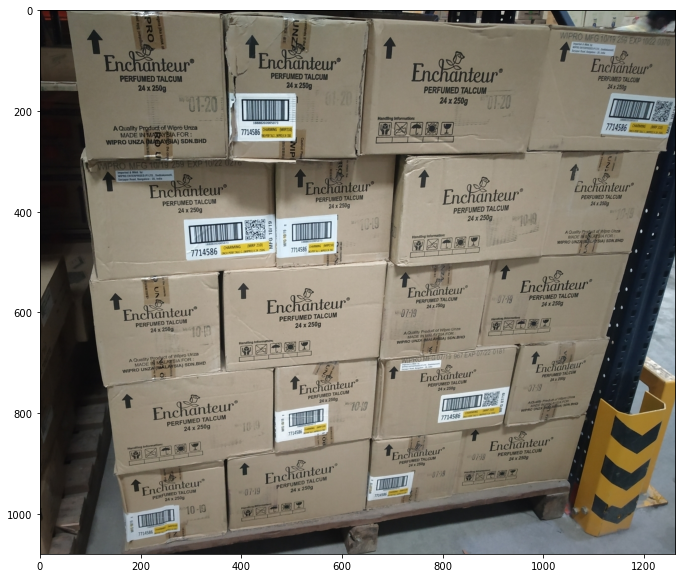

In [5]:
# Preprocess image 
image = test_image
display_img(image)

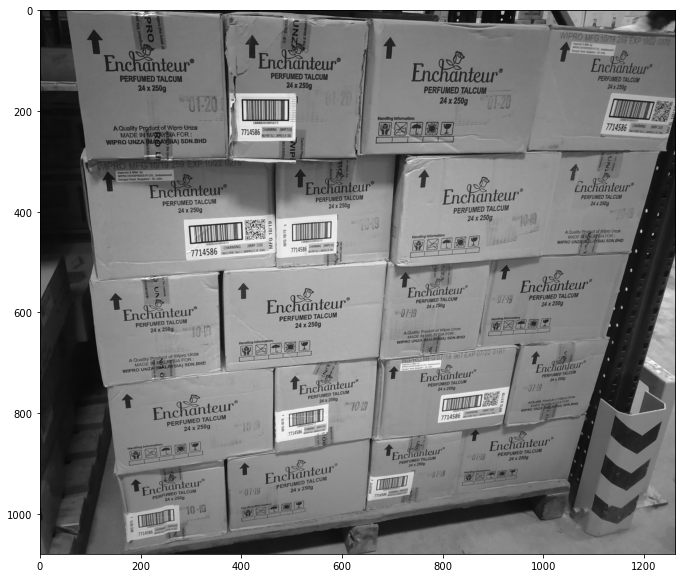

In [6]:
gray_img = get_grayscale(image)
display_img(gray_img)

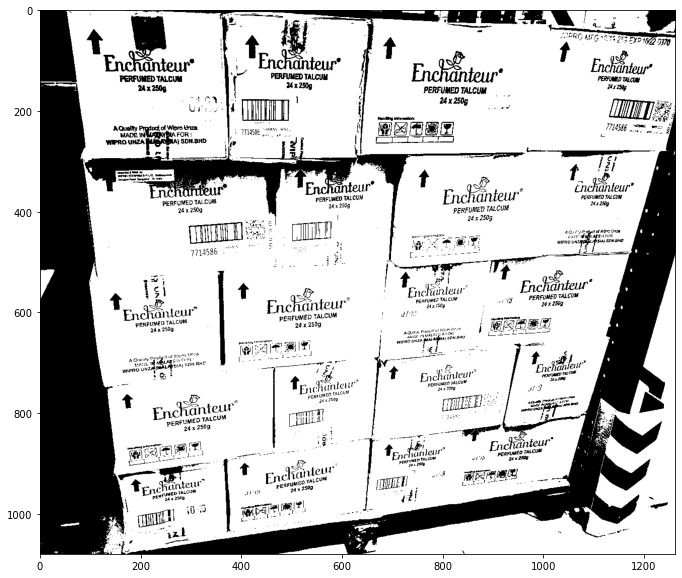

In [7]:
threshold_image = thresholding(gray_img)
display_img(threshold_image)

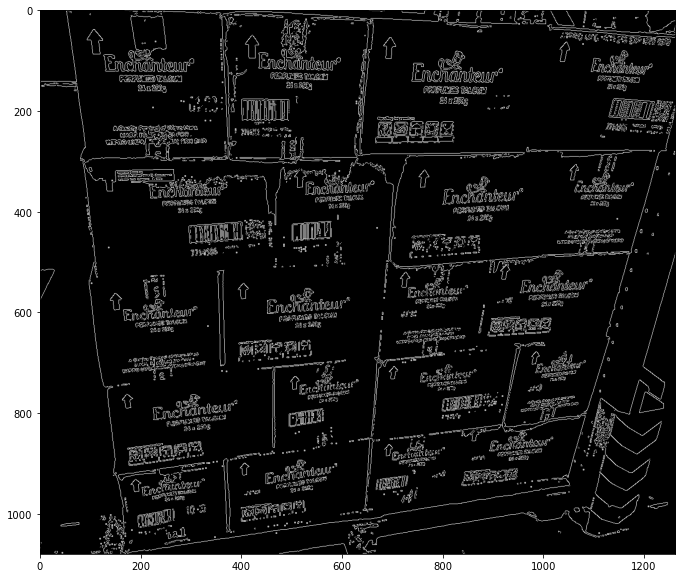

In [8]:
canny = canny(threshold_image)
display_img(canny)

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


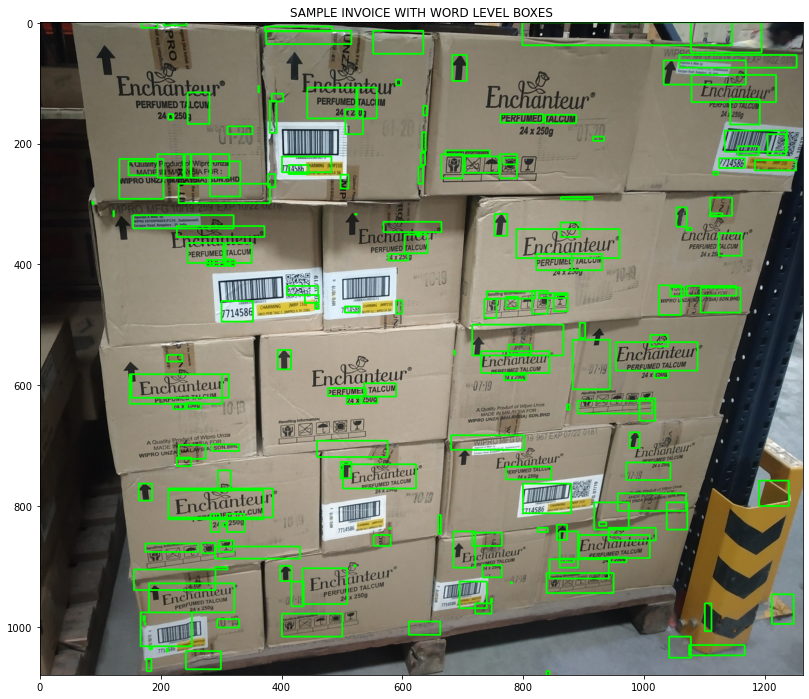

In [11]:
# Plot word boxes on image using pytesseract.image_to_data() function

custom_config = r'--oem 3 --psm 6'
image = test_image
d = pytesseract.image_to_data(image, config=custom_config,output_type=Output.DICT,lang='eng')
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 0:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()

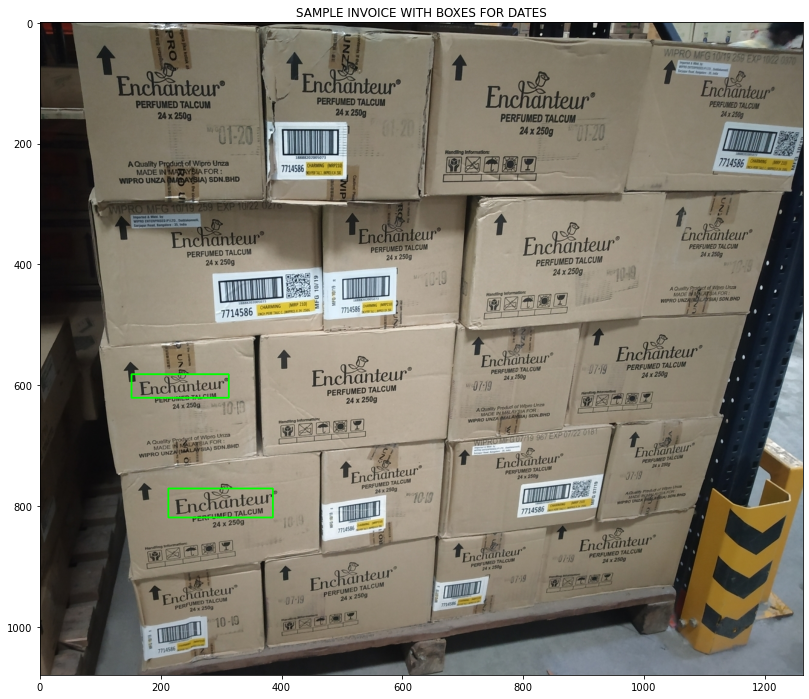

In [9]:
custom_config = r'--oem 3 --psm 6'
# Plot boxes around text that matches a certain regex template
# In this example we will extract the date from the sample invoice

image = image
d = pytesseract.image_to_data(threshold_image, config=custom_config,output_type=Output.DICT,lang='eng')

date_pattern = 'Enchanteu'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 0:
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH BOXES FOR DATES')
plt.show()

In [10]:
d['text']

['',
 '',
 '',
 '',
 '4',
 'oo',
 '1.',
 '',
 'ry',
 'se',
 '',
 '14',
 '4',
 'a',
 '',
 '1',
 '.',
 'J',
 'GATS',
 '255',
 'Eye',
 'ae',
 'gy',
 '',
 'PERFUMED',
 'TALCUM',
 'ee',
 'paseo',
 '',
 'Axdig',
 '[',
 'preload',
 '/',
 '.',
 '',
 'Tea.',
 'i',
 'PERF',
 'PeRrNED:',
 '',
 'iv:',
 '1',
 '‘',
 '“UMED',
 'TALCUM',
 'TALC',
 '',
 'ae',
 '|',
 'we',
 'oe',
 'se',
 '',
 'we',
 'eNO,',
 'STR',
 '1',
 '@',
 'ley;',
 '',
 '.',
 'ef',
 '2]',
 'I',
 'THB',
 'a',
 '',
 ',',
 'a',
 'Sj',
 '.',
 'need',
 '',
 'cer',
 'a',
 '©',
 'a',
 'aq',
 'ct',
 '—',
 'z=',
 '',
 'Prentice',
 'GF',
 'our?',
 't',
 'o',
 't',
 '(2',
 'j',
 '',
 'PERFUMED',
 'TALCUM',
 'penruaeo',
 'ALUM',
 'Enchianteur®',
 'énchithtew',
 "'",
 '',
 'Tn',
 'wes',
 '=',
 '\\',
 'PERFUMED',
 'TALCUM',
 'matey',
 '',
 'ae',
 '2',
 'Cr',
 '24x',
 '2509',
 'on',
 '',
 'masse',
 'er',
 'Qe',
 'eee',
 'eee,',
 'fi',
 '',
 ';',
 '3',
 'Si',
 'ecrinl',
 'ai',
 'ate',
 '',
 'Ve}',
 't',
 'pour',
 'FF,',
 '——',
 '',
 'be?',
 'el',
